In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from pycocotools.coco import COCO

In [2]:
base_folder = 'C:/Users/chuck/OneDrive/Desktop/Honors/PV-Cell-Segmentation/train/'
coco = COCO(f'{base_folder}_annotations.coco.json')
img_dir = f'{base_folder}Raws/'
img = coco.imgs[0]

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


[[157 159 166 ... 146 146 145]
 [157 158 164 ... 178 169 163]
 [156 155 159 ... 185 172 163]
 ...
 [203 185 167 ... 169 170 168]
 [197 180 164 ... 165 167 163]
 [176 167 162 ... 162 164 161]]


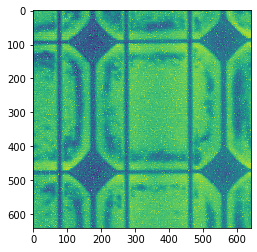

In [4]:
image = np.array(cv2.imread(os.path.join(img_dir, img['file_name']), 0))
print(image)
cv2.imwrite("example_raw.jpg", image)
plt.imshow(image, interpolation='nearest')

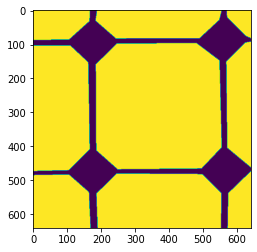

In [5]:
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
mask = coco.annToMask(anns[0])*0
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
cv2.imwrite("example_mask.jpg", mask*255)
plt.imshow(mask)

In [10]:
def generate_mask(img, coco):
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    
    if len(anns) == 0:
        print(img)
        mask = np.zeros((int(img['height']), int(img['width'])))
        return mask, img['file_name']
    
    mask = coco.annToMask(anns[0])*0
    for i in range(len(anns)):
        mask += coco.annToMask(anns[i])
        
    mask = mask*255
    return mask, img['file_name']

In [11]:
x = len(coco.imgs)
print(x)
for i in range(x):
    print(i)
    img = coco.imgs[i]
    mask, file_name = generate_mask(img, coco)
    cv2.imwrite(f"{base_folder}masks/{file_name}", mask)

471
0
1
2
3
4
{'id': 4, 'license': 1, 'file_name': '1679539200-273538_1_jpg.rf.8bf238863051adeae5fb06111d73def1.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-03-28T09:00:33+00:00'}
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231